In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

import statsmodels.regression.linear_model as smf
import statsmodels.tools.tools as sm_tools

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# No need for an open connection, because you're only doing a single query
engine.dispose()

In [3]:
### 1. Predicting temperature

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

In [6]:
total_missing = weather_df.isnull().sum().sort_values(ascending = False)
percent_missing = (weather_df.isnull().sum() / weather_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
date,0,0.0
summary,0,0.0
preciptype,0,0.0
temperature,0,0.0
apparenttemperature,0,0.0
humidity,0,0.0
windspeed,0,0.0
windbearing,0,0.0
visibility,0,0.0
loudcover,0,0.0


In [17]:
Y = weather_df['temperature']
X = weather_df[['humidity','windspeed','windbearing','pressure']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


X = sm_tools.add_constant(X)
results = smf.OLS(Y, X).fit()
results.summary()


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:04:58   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Assumption 1: Correct model specification

lrm_example = linear_model.LinearRegression()
lrm_example.fit(X, Y)

LinearRegression()

In [19]:
predictions = lrm_example.predict(X)
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)


Coefficients: 
 [ 0.00000000e+00 -3.24962454e+01 -2.01413742e-01  4.04836936e-03
 -6.91759209e-04]

Intercept: 
 37.926438185282834


AttributeError: module 'matplotlib.pyplot' has no attribute 'color'

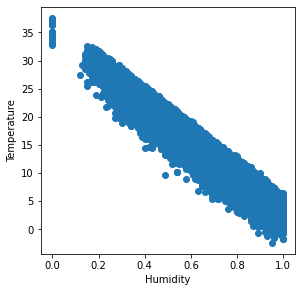

In [31]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.scatter(weather_df['humidity'], predictions)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Humidity vs Temperature')

plt.subplot(2, 2, 2)
plt.scatter(weather_df['windspeed'], predictions)
plt.xlabel("Windspeed")
plt.ylabel("Temperature")
plt.title('Windspeed vs Temperature')

plt.subplot(2, 2, 3)
plt.scatter(weather_df['windbearing'], predictions)
plt.xlabel("Windbearing")
plt.ylabel("Temperature")
plt.title('Windbearing vs Temperature')

plt.subplot(2, 2, 4)
plt.scatter(weather_df['pressure'], predictions)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.title('Pressure vs Temperature')

plt.show()

In [26]:
# Assumption 2: The error term's expected value
#X = X.drop('const', axis = 1)
X.head()
predictions = lrm.predict(X)
errors = Y - predictions
print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

# error term is extremely close to 0 so b term / intercept was calculated correctly.

Mean of the errors in the weather model is: -4.714704061941714e-16


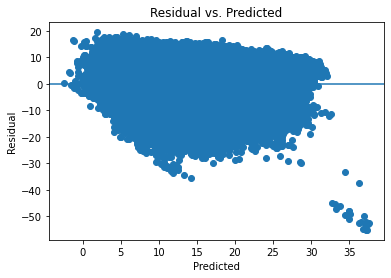

In [27]:
# Assumption 4: Homoscedasticity

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

# Passes the assumption because test stats are fairly close with pvalues under .05

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


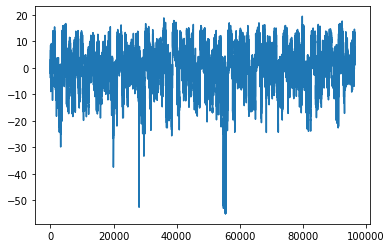

In [29]:
# Assumption 6: Uncorrelated error terms

plt.plot(errors)
plt.show()

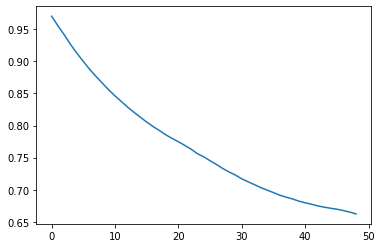

In [30]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

# I believe this indicates there is not a high variance across variables error means? And therefore does not ass
# the assumption.

In [32]:
### 2. House prices

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [33]:
features_init = houses_df[['overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf', 'centralair']]
centralair_df = pd.get_dummies(features_init['centralair'])
features = features_init.drop(['centralair'], axis = 1).merge(centralair_df, left_index = True, right_index = True)
import statsmodels.regression.linear_model as smf
import statsmodels.tools.tools as sm_tools
X = features
Y = houses_df.saleprice
X = sm_tools.add_constant(X)
results = smf.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     855.3
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:33:21   Log-Likelihood:                -17543.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1454   BIC:                         3.513e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.433e+04   3377.803    -22.006      0.000    -8.1e+04   -6.77e+04
overallqual  2.762e+04   1048.864     26.335      0.000    2.56e+04    2.97e+04
grlivarea      46.9016      2.760     16.990      0.000      41.487      52.317
totalbsmtsf    24.5082      4.447      5.511      0.000      15.785      33.232
firstflrsf     17.0189      5.160      3.299      0.001       6.898      27.140
N            -4.54e+04   2972.115    -15.275      0.000   -5.12e+04   -3.96e+04
Y           -2.893e+04   2609.431    -11.088      0.000   -3.41e+04   -2.38e+04
==============================================================================
Omnibus:                      491.366   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43573.793
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                      29.737   Cond. No.                     3.82e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


Coefficients: 
 [ 0.00000000e+00  2.76222886e+04  4.69015820e+01  2.45081697e+01
  1.70189070e+01 -8.23286346e+03  8.23286346e+03]

Intercept: 
 -111497.24970311046


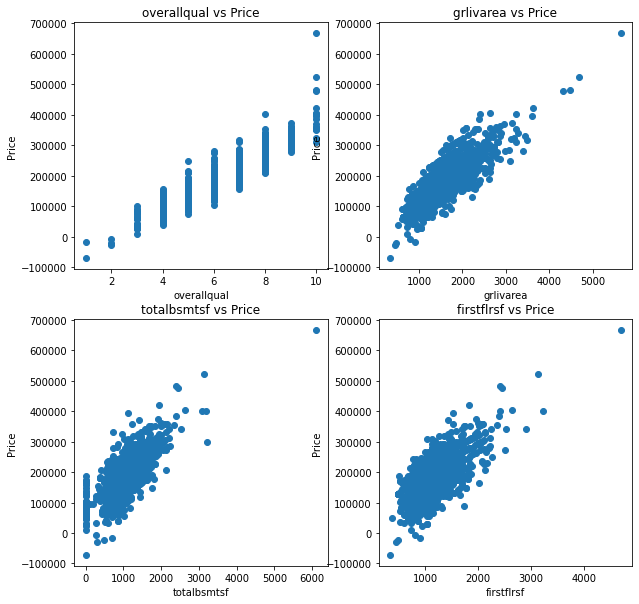

In [34]:
# Assumption 1: Correct model specification

lrm_example = linear_model.LinearRegression()
lrm_example.fit(X, Y)
predictions = lrm_example.predict(X)

print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.scatter(features['overallqual'], predictions)
plt.xlabel("overallqual")
plt.ylabel("Price")
plt.title('overallqual vs Price')

plt.subplot(2, 2, 2)
plt.scatter(features['grlivarea'], predictions)
plt.xlabel("grlivarea")
plt.ylabel("Price")
plt.title('grlivarea vs Price')

plt.subplot(2, 2, 3)
plt.scatter(features['totalbsmtsf'], predictions)
plt.xlabel("totalbsmtsf")
plt.ylabel("Price")
plt.title('totalbsmtsf vs Price')

plt.subplot(2, 2, 4)
plt.scatter(features['firstflrsf'], predictions)
plt.xlabel("firstflrsf")
plt.ylabel("Price")
plt.title('firstflrsf vs Price')

plt.show()

In [41]:
# Assumption 2: The error term's expected value
tempX = X.drop('const', axis = 1)
tempX = tempX.drop('N', axis = 1)
tempX = tempX.drop('Y', axis = 1)
tempX.head()
predictions = lrm.predict(tempX)
errors = Y - predictions
print("Mean of the errors in the house price model is: {}".format(np.mean(errors)))

# Error term is extremely high failing the assumption and indicating that the intercept value
# could be incorrect.

Mean of the errors in the house price model is: 181383.2328994109


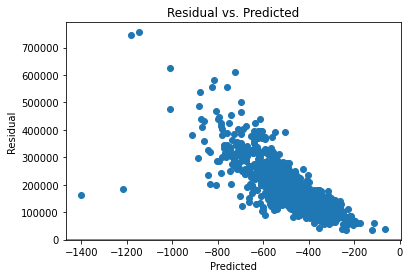

In [42]:
# Assumption 4: Homoscedasticity

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

In [44]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

# Both pvalues are under .05 but the test stats have a very high variance so this likely fails
# the assumption

Bartlett test statistic value is 16551.5 and p value is 0
Levene test statistic value is 1266.52 and p value is 1.02e-230


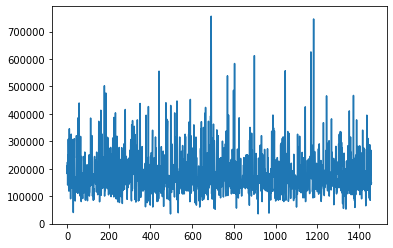

In [45]:
# Assumption 6: Uncorrelated error terms

plt.plot(errors)
plt.show()

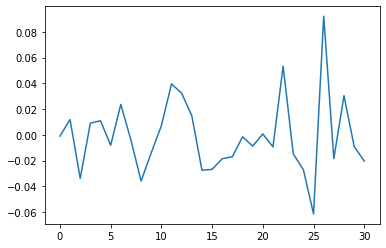

In [46]:
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

# Passes this assumption indicating there is not a codependance between variables.